In [1]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data = pd.read_csv(mouse_drug_data_to_load)
# Combine the data into a single dataset
merged_data = pd.merge(mouse_data, clinical_data, on="Mouse ID")


In [2]:
nMerged_data = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug']]
nMerged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


In [3]:
#--------------------------------------------------------------------------------------------------------------------------------------
#Tumor Response to Treatment:
#--------------------------------------------------------------------------------------------------------------------------------------
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
#--------------------------------------------------------------------------------------------------------------------------------------
#sort data frame by drug and timepoint 
D_T_group_df = nMerged_data.groupby(['Drug', 'Timepoint'])
#create a grouped mean volume series using mean() function
grouped_mean_vol = D_T_group_df['Tumor Volume (mm3)'].mean()
#convert the mean volumne series data into a data frame
grouped_mean_vol_df = pd.DataFrame(grouped_mean_vol)
#reset index to display data in apporpriate format 
grouped_mean_vol_df = grouped_mean_vol_df.reset_index()
grouped_mean_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
#--------------------------------------------------------------------------------------------------------------------------------------
#use sem() function on tumor volume of the grouped data frame 
standard_vol_error = D_T_group_df['Tumor Volume (mm3)'].sem()
#create a data frame using the standard error series
standard_vol_error_df = pd.DataFrame(standard_vol_error)
#reset to acquire desired format
standard_vol_error_df = standard_vol_error_df.reset_index()
standard_vol_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
#--------------------------------------------------------------------------------------------------------------------------------------
#use pivot method on standard_vol_error_df to obtain a data frame grouped by "Timepoint", with columns as drugs, and values as volume error
vol_err_by_Drug = standard_vol_error_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
vol_err_by_Drug.head()
#--------------------------------------------------------------------------------------------------------------------------------------
#use pivot method on group_mean_vol_df to obtain a data frame grouped by "Timepoint", with columns as drugs, and values as volume
vol_by_drug = grouped_mean_vol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
vol_by_drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


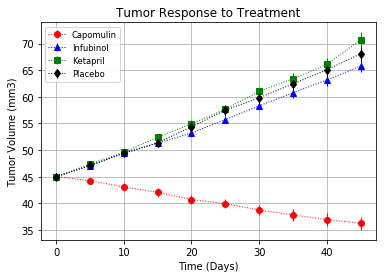

In [6]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Generate the Plot (with Error Bars)
# Save the Figure
#--------------------------------------------------------------------------------------------------------------------------------------
#create an array of values from 0 to 45 with intervals of 5 
x_axis = np.arange(0, 50, 5)
#create line plots (of x_axis vs vol_by_drug for each drug) with errorbars based on corresponding vol_err_by_Drug
#add: linewidth, marker, ms(marker size), color, and label
plt.errorbar(x_axis, vol_by_drug['Capomulin'], yerr=vol_err_by_Drug['Capomulin'], linewidth=1, marker='o', ms=6, color='red', label= "Capomulin", linestyle=':')

plt.errorbar(x_axis, vol_by_drug['Infubinol'], yerr=vol_err_by_Drug['Infubinol'], linewidth=1, marker='^', ms=6, color='blue', label= "Infubinol", linestyle=':')

plt.errorbar(x_axis, vol_by_drug['Ketapril'], yerr=vol_err_by_Drug['Ketapril'], linewidth=1, marker='s', ms=6, color='green', label= "Ketapril", linestyle=':')

plt.errorbar(x_axis, vol_by_drug['Placebo'], yerr=vol_err_by_Drug['Placebo'], linewidth=1, marker='d', ms=6, color='black', label= "Placebo", linestyle=':')

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


plt.legend(loc="best", fontsize="small", fancybox=True)


In [7]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Metastatic Response to Treatment:
#--------------------------------------------------------------------------------------------------------------------------------------
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
#--------------------------------------------------------------------------------------------------------------------------------------
grouped_mean_Met = D_T_group_df['Metastatic Sites'].mean()
grouped_mean_Met_df = pd.DataFrame(grouped_mean_Met)
grouped_mean_Met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
#--------------------------------------------------------------------------------------------------------------------------------------
standard_Met_error = D_T_group_df['Metastatic Sites'].sem()
standard_Met_error_df = pd.DataFrame(standard_Met_error)
standard_Met_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
#--------------------------------------------------------------------------------------------------------------------------------------
#create a data frame of standard error for metastatic values groupedby Timepoint.. with comlumns set to drug names
#this will provide us with an easy way to reference a series containing standard error for metastatic values grouped by timepoint
grouped_err_Met_rein = standard_Met_error_df.reset_index()
Met_err_by_Drug = grouped_err_Met_rein.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
Met_err_by_Drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [11]:
#create a data frame of mean metstatic values grouped by Timepoint.. with columns set to drug names 
grouped_mean_Met_rein = grouped_mean_Met_df.reset_index()
Met_by_drug = grouped_mean_Met_rein.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
Met_by_drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


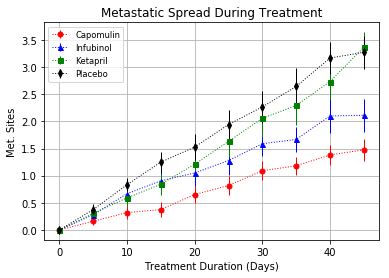

In [12]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
#--------------------------------------------------------------------------------------------------------------------------------------
#create line plots (of x_axis vs Met_by_drug for each drug) with errorbars based on corresponding Met_err_by_Drug
#add: linewidth, marker, ms(marker size), color, and label
plt.errorbar(x_axis, Met_by_drug['Capomulin'], yerr=Met_err_by_Drug['Capomulin'], linewidth=1, marker='o', ms=5, color='red', label= "Capomulin", linestyle=':')

plt.errorbar(x_axis, Met_by_drug['Infubinol'], yerr=Met_err_by_Drug['Infubinol'], linewidth=1, marker='^', ms=5, color='blue', label= "Infubinol", linestyle=':')

plt.errorbar(x_axis, Met_by_drug['Ketapril'], yerr=Met_err_by_Drug['Ketapril'], linewidth=1, marker='s', ms=5, color='green', label= "Ketapril", linestyle=':')

plt.errorbar(x_axis, Met_by_drug['Placebo'], yerr=Met_err_by_Drug['Placebo'], linewidth=1, marker='d', ms=5, color='black', label= "Placebo", linestyle=':')

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()

# plt.legend(loc="best")
plt.legend(loc="best", fontsize="small", fancybox=True)

In [13]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Survival Rates:
#--------------------------------------------------------------------------------------------------------------------------------------
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
#--------------------------------------------------------------------------------------------------------------------------------------
Mouse_count = D_T_group_df['Mouse ID'].nunique()
Mouse_count_df = pd.DataFrame(Mouse_count)
Mouse_count_rein = Mouse_count_df.reset_index()
Mouse_count_rein = Mouse_count_rein.rename(columns={'Mouse ID': 'Mouse Count'})
Mouse_count_rein.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
#--------------------------------------------------------------------------------------------------------------------------------------
Ms_count_by_Drug = Mouse_count_rein.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
Ms_count_by_Drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


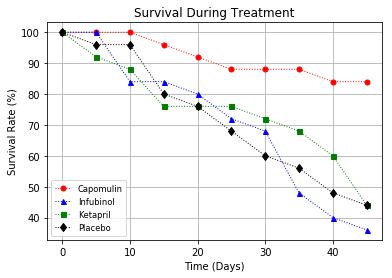

In [15]:
#--------------------------------------------------------------------------------------------------------------------------------------
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
#--------------------------------------------------------------------------------------------------------------------------------------
#create a survival percentage series based on a given mouse count element (in a drug column series) divided by the original count
#original count is indicated by the first element of the series.
#finally multiply the quotient by 100 to obtain the survival percentage.
Cap_survival_percent = (Ms_count_by_Drug['Capomulin']/Ms_count_by_Drug['Capomulin'][0]) * 100
Infub_survival_percent = (Ms_count_by_Drug['Infubinol']/Ms_count_by_Drug['Infubinol'][0]) * 100
Keta_survival_percent = (Ms_count_by_Drug['Ketapril']/Ms_count_by_Drug['Ketapril'][0]) * 100
Plac_survival_percent = (Ms_count_by_Drug['Placebo']/Ms_count_by_Drug['Placebo'][0]) * 100
#--------------------------------------------------------------------------------------------------------------------------------------
#create line plots (of x_axis vs survival percentage for each drug) 
#add: linewidth, marker, ms(marker size), color, and label
plt.plot(x_axis, Cap_survival_percent, linewidth=1, marker='o', ms=5, color='red', label= "Capomulin", linestyle=':')

plt.plot(x_axis, Infub_survival_percent, linewidth=1, marker='^', ms=5, color='blue', label= "Infubinol", linestyle=':')

plt.plot(x_axis, Keta_survival_percent, linewidth=1, marker='s', ms=5, color='green', label= "Ketapril", linestyle=':')

plt.plot(x_axis, Plac_survival_percent, linewidth=1, marker='d', ms=6, color='black', label= "Placebo", linestyle=':')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# plt.legend(loc="best")
plt.legend(loc="best", fontsize="small", fancybox=True)

In [16]:
vol_percent_chg = ((vol_by_drug.loc[45, :] - vol_by_drug.loc[0, :])/vol_by_drug.loc[0, :]) * 100
vol_percent_chg

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

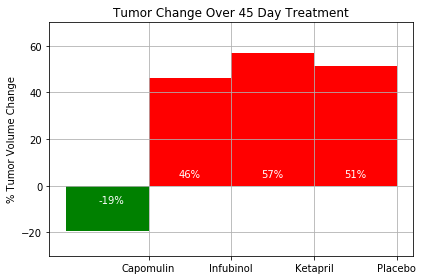

In [17]:
#--------------------------------------------------------------------------------------------------------------------------------------
# # Store all Relevant Percent Changes into a Tuple
vol_percent_chg_tup = (vol_percent_chg['Capomulin'], vol_percent_chg['Infubinol'],
vol_percent_chg['Ketapril'], vol_percent_chg['Placebo'])

# # Splice the data between passing and failing drugs
axis_value = np.arange(1, 4, 1)
axis_value2 = np.arange(1)
failing_data = vol_percent_chg_tup[1:]
passing_data = vol_percent_chg_tup[0]



plt.bar(axis_value, failing_data, width=1, color='r', align="center")
plt.bar(axis_value2, passing_data, width=1, color='g', align="center")
# Orient widths. Add labels, tick marks, etc. 

ytick_locations = [-20, 0, 20, 40, 60]
xtick_locations = [0.5, 1.5, 2.5, 3.5]
plt.xticks(xtick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.yticks(ytick_locations)


plt.ylim(-30, 70)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()

# # Use functions to label the percentages of changes
text_xlocations = [1, 2, 3]
text_perc = ["46%", "57%", "51%"]
# plt.text(0.25, 0, 'matplotlib', horizontalalignment='right', verticalalignment='top')
plt.annotate('-{:}%'.format(19), xy=(0.05, -4), horizontalalignment='center', verticalalignment='top', color='white')
plt.annotate('{:}%'.format(46), xy=(1.0, 7), horizontalalignment='center', verticalalignment='top', color='white')
plt.annotate('{:}%'.format(57), xy=(2.0, 7), horizontalalignment='center', verticalalignment='top', color='white')
plt.annotate('{:}%'.format(51), xy=(3.0, 7), horizontalalignment='center', verticalalignment='top', color='white')

plt.tight_layout()